# Titanic

https://www.kaggle.com/competitions/titanic/data

## Cargar datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/titanic2.csv')
df.tail(2)

,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,Behr,Mr. Karl Howell,male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,Dooley,Mr. Patrick,male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,667,803,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,Andersson,Mr. John,male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,9,7,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Valores faltantes

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Prefix           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
df['Cabin'].fillna('Other', inplace=True)

In [8]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Prefix         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Valores atípicos (outliers)

In [12]:
df.head(2)

,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Other,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: >

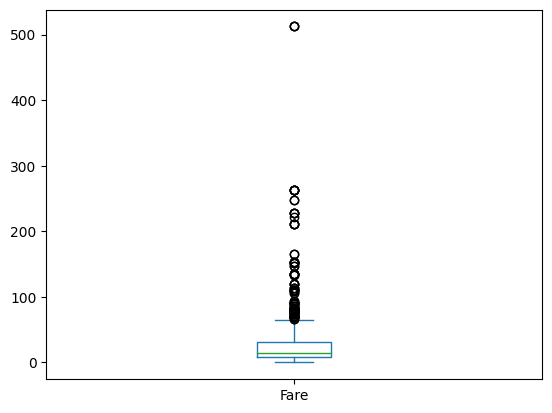

In [13]:
df['Fare'].plot(kind='box')

In [14]:

# Primer cuartil (cuartil 25)
Q1 = df['Fare'].quantile(0.25) # 7.89
# Tercer cuartil (cuartil 75)
Q3 = df['Fare'].quantile(0.75) # 31.47
# Rango intercuartílico (IQR): medida de dispersión, determina el 50% central
IQR = Q3 - Q1
IQR

23.0896

In [15]:
# filtro para quedarnos con datos que no son outliers
# Inferior: se considera outlier si está por debajo de Q1 - 1.5 * IQR
# Superior: se considera outlier si está por encima de Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
filter = (df['Fare'] >= limite_inferior) & (df['Fare'] <= limite_superior)

In [16]:
df_no_outlier = df.loc[filter]
print(df.shape) # 418
print(df_no_outlier.shape) # 363

(891, 13)
(775, 13)


<Axes: >

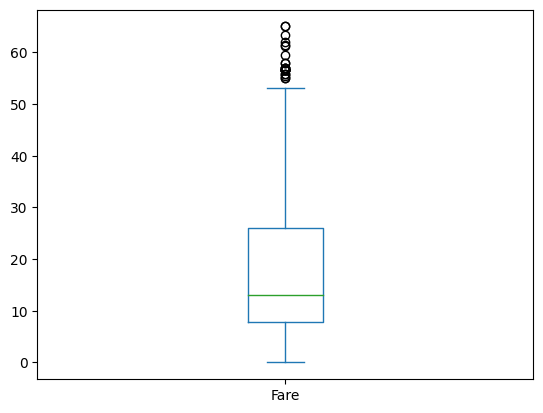

In [17]:
df_no_outlier['Fare'].plot(kind='box')

## Agrupación

In [18]:
# Media de edad por género
df.groupby('Sex')['Age'].mean()


Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64

In [19]:
# media, mediana y std de edad por Pclass
df.groupby('Pclass')['Age'].agg(['mean', 'median', 'std', 'max', 'min'])

,mean,median,std,max,min
Pclass,,,,,
1,36.812130,35.0,14.182103,80.0,0.92
2,29.765380,28.0,13.581096,70.0,0.67
3,25.932627,28.0,10.697676,74.0,0.42


## Transformar una column

In [20]:
# Discretizar la columna Fare en valores: 1, 2, 3, y 4
def fare_category(fare):
    if fare <= 20:
        return 1 # barato
    elif fare <= 40:
        return 2 # medio
    elif fare <= 70:
        return 3 # caro
    else:
        return 4 # premium


df['fare_category'] = df['Fare'].apply(fare_category)
df['fare_category'].value_counts()

1    515
2    200
4    105
3     71
Name: fare_category, dtype: int64

In [21]:
# crear una nueva columna fare_discount que sea Fare con un 10% de descuento aplicado
# apply con una función lambda
df['fare_discounted'] = df['Fare'].apply(lambda fare: fare * 0.90)
df.head(2)


,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,fare_discounted
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Other,S,1,6.52500
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,4,64.15497


## Codificación categórico a numérico

Función map

In [22]:
# crear nueva columna sex a numérico male 0 y female 1
df['sex_int'] = df['Sex'].map({
    'male': 0,
    'female': 1
})
df.head(4)



,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,fare_discounted,sex_int
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Other,S,1,6.52500,0
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,4,64.15497,1
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S,1,7.13250,1
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,3,47.79000,1


In [23]:
# crear nueva convertir la columna embarked a numérico S: 1, C: 2, Q: 3
df['embarked_int'] = df['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})
df.head(3)

,PassengerId,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,fare_discounted,sex_int,embarked_int
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Other,S,1,6.52500,0,0
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,4,64.15497,1,1
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S,1,7.13250,1,0


In [24]:
# otro enfoque
df['Embarked'].astype('category').cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int8

## Crear una nueva columna

Nueva columna que represente el número total de personas en un mismo grupo que viaja: FamilySize.


In [25]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [26]:
# 0 viaja acompañado
# 1 viaja solo
df['alone'] = 0
df.loc[df['family_size'] == 1, 'alone'] = 1 # viaja solo
df['alone'].value_counts()

1    537
0    354
Name: alone, dtype: int64

## Eliminar columnas

In [27]:
df.drop(columns=['PassengerId'],inplace=True)
df.head()

,Survived,Pclass,Prefix,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,fare_discounted,sex_int,embarked_int,family_size,alone
0,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Other,S,1,6.52500,0,0,2,0
1,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,4,64.15497,1,1,2,0
2,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S,1,7.13250,1,0,1,1
3,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,3,47.79000,1,0,2,0
4,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,Other,S,1,7.24500,0,0,1,1


## Guardar el dataset

In [28]:
df.to_csv('../../data/titanic_clean.csv', index=False)